In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Problem 2: A visual history of Nobel prize winners

In [2]:
# load the data
url = '../../../Data/nobel.csv'
nobel = pd.read_csv(url)

Display the first 10 rows.

In [3]:
nobel.head(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


## Part 1: who gets the Nobel Prize?

Count the number of rows (prizes) 

In [4]:
len(nobel)

969

Count the number of prizes, grouped by `sex`.

In [5]:
nobel.groupby('Sex')['Prize'].count()

Sex
Female     50
Male      893
Name: Prize, dtype: int64

Count the number of prizes, grouped by `Birth Country`. Arrange the result by no. prizes in descending order and display the first 20 rows.

In [6]:
nobel.groupby('Birth Country')['Prize'].count().sort_values(ascending=False).head(20)

Birth Country
United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Switzerland                  17
Austria                      15
Norway                       13
China                        12
Australia                    11
Denmark                      11
Germany (Poland)             10
Scotland                      9
Belgium                       9
South Africa                  9
Name: Prize, dtype: int64

## Part 2: USA dominance

Add a `usa_born_winner` column to the `nobel` DataFrame, where the value is `TRUE` when `Birth Country` is "United States of America".

In [7]:
nobel['usa_born_winner'] = nobel['Birth Country'] == 'United States of America'

Add a `decade` column to the `nobel` DataFrame showing the decade the prize was awarded (1953 should become 1950, for example).

In [8]:
# Hint: you can use Python floor division // to compute the decade of a year
# (1953//10)*10 = 1950
nobel['decade'] = (nobel['Year']//10)*10

Calculate the percentage of USA born winners for each decade.

In [9]:
usa_winners_percentage_decades = nobel.groupby(['decade'])['usa_born_winner'].value_counts(normalize=True).unstack() * 100

Plot the percentage of USA born winners per decade.

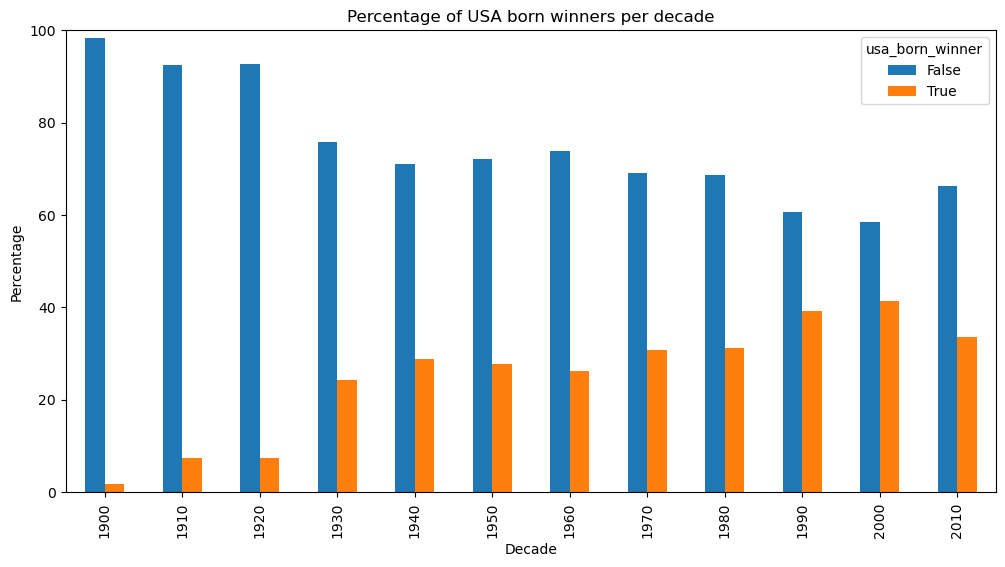

In [10]:
usa_winners_percentage_decades.plot(kind='bar', figsize=(12, 6))
plt.ylabel('Percentage')
plt.xlabel('Decade')
plt.title('Percentage of USA born winners per decade')
# y axis * 100
plt.ylim(0, 100)
plt.show()

## Part 3: What is the gender of a typical Nobel Prize winner?

Add a `female_winner` column, where the value is `TRUE` when `Sex` is 'Female'

In [11]:
nobel['female_winner'] = nobel['Sex'] == 'Female'

Calculate the percentage of female winners by decade and category.

In [12]:
female_decade_winners_percent = nobel.groupby(['decade', 'Category'])['female_winner'].value_counts(normalize=True).unstack() * 100
# replace nans with 0
female_decade_winners_percent.fillna(0, inplace=True)
female_decade_winners_percent

female_winner           False       True
decade Category                         
1900   Chemistry   100.000000   0.000000
       Literature   90.000000  10.000000
       Medicine    100.000000   0.000000
       Peace        92.857143   7.142857
       Physics      92.307692   7.692308
...                       ...        ...
2010   Economics   100.000000   0.000000
       Literature   71.428571  28.571429
       Medicine     90.000000  10.000000
       Peace        60.000000  40.000000
       Physics     100.000000   0.000000

[66 rows x 2 columns]

Plot the percentage of female winners by decade and category.

<AxesSubplot:xlabel='decade,Category'>

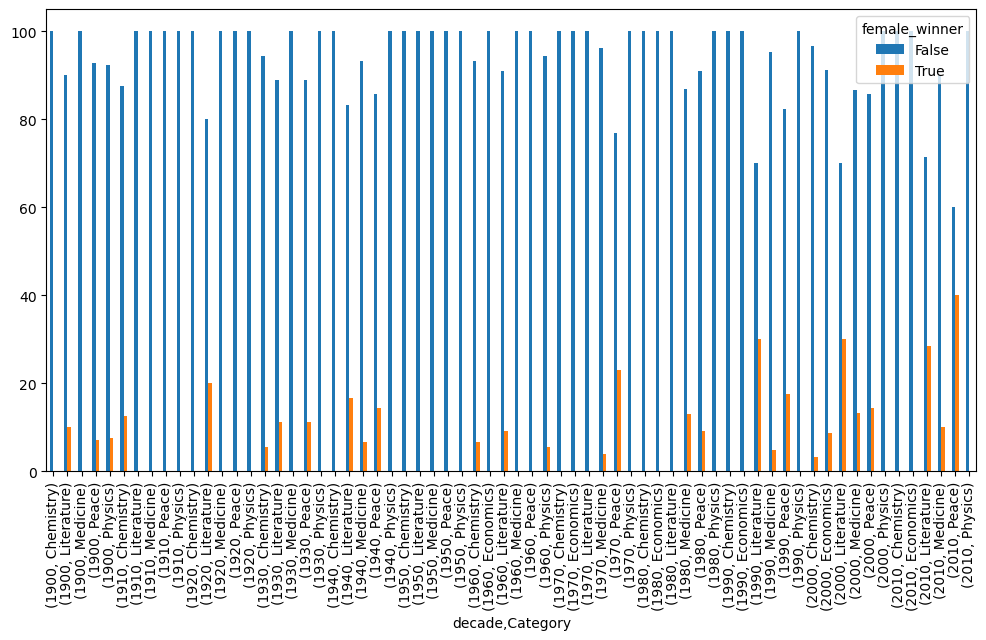

## Part 4: The first woman to win the Nobel Prize

Find the first woman to win a Nobel Prize.

## Part 5: Repeat laureates

Use the `count` method to count the number of wins grouped by `Full Name`.

## Part 6: How old are you when you get the prize?

Fix Albert John Lutuli and A. Michael Spence `Birth Date` values

Calculate how old people were when they got their prize. Assign the resulting Series to the `nobel_age` column.

Plot `nobel_age` as a function of `Year` as a scatter plot.

## Part 6: Oldest and youngest winners

Find the oldest winner.

Find the youngest winner.